<a href="https://colab.research.google.com/github/VindhyaHV/Python_ML_CaseStudy/blob/main/Hospital_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tika

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32893 sha256=943fb64d9dfa09324f7e588d6fda0f2e893dba9876285a71d1a28cfc53f48a4b
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


In [ ]:
#https://stackoverflow.com/questions/34837707/how-to-extract-text-from-a-pdf-file
from tika import parser # pip install tika
import re
raw = parser.from_file('Mazhar Mody (2).pdf')

In [ ]:
text = raw['content']

Policy Number

In [ ]:
re.findall('\\bPolicy number: (P.*[0-9])',text)

['P/141111/01/2021/005055']

Customer Name 

In [ ]:
re.findall('Customer Name\ (.*):',text)

['Mr.MAZHAR A MODY']

Limit of Coverage

In [ ]:
re.findall('Limit of Coverage\ :\ (.*)Rs.Bonus',text)

['435000']

###Patient 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas.util.testing as tm

In [ ]:
df = pd.read_excel('business_report (1).xlsx')



```
Prepare a mekko chart using the attached report which depicts the various hospitals and a drill down to detect the total no of patients from these hospitals and the insurance companies /TPA that are affiliated with these hospitals.
```



Patient Name

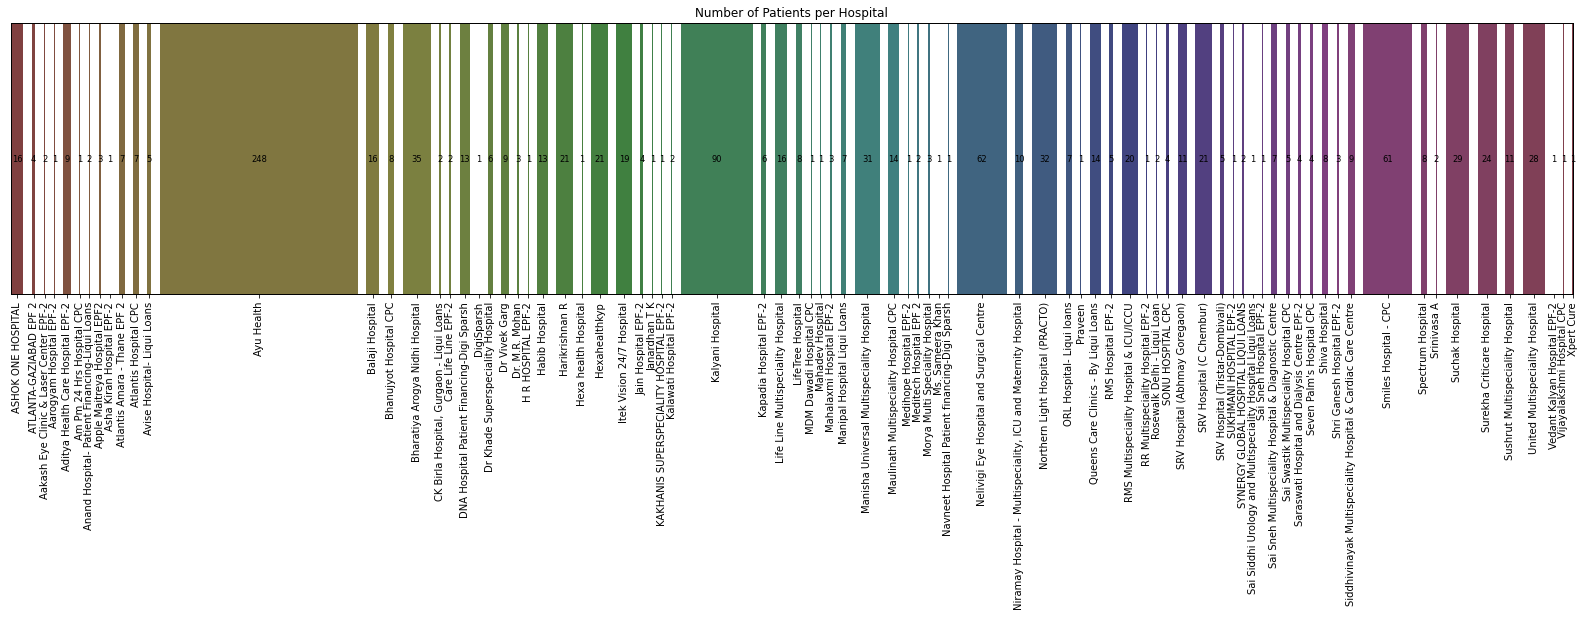

In [ ]:
data = df[['Hospital Name','Patient Name']].groupby(['Hospital Name']).count()
#dict {'Hospital Name':'Patient Count'}
d = {}
for i in range(len(data)):
  d[data.index[i]]=data.iloc[i,0]

#labelizer 
#https://apimirror.com/statsmodels/generated/statsmodels.graphics.mosaicplot.mosaic

label = {}
for i in d.keys():
  label[(i,)]=str(d[i])
labelizer = lambda k:label[k]

#Plotting mosaic / Marimekka plot 

index = df['Patient Name'].value_counts()
plt.rcParams["figure.figsize"]=(28, 5)
mosaic(d,label_rotation=90,labelizer=labelizer,title='Number of Patients per Hospital',gap=0.01)
plt.show()

TPA / Insurance co. Name

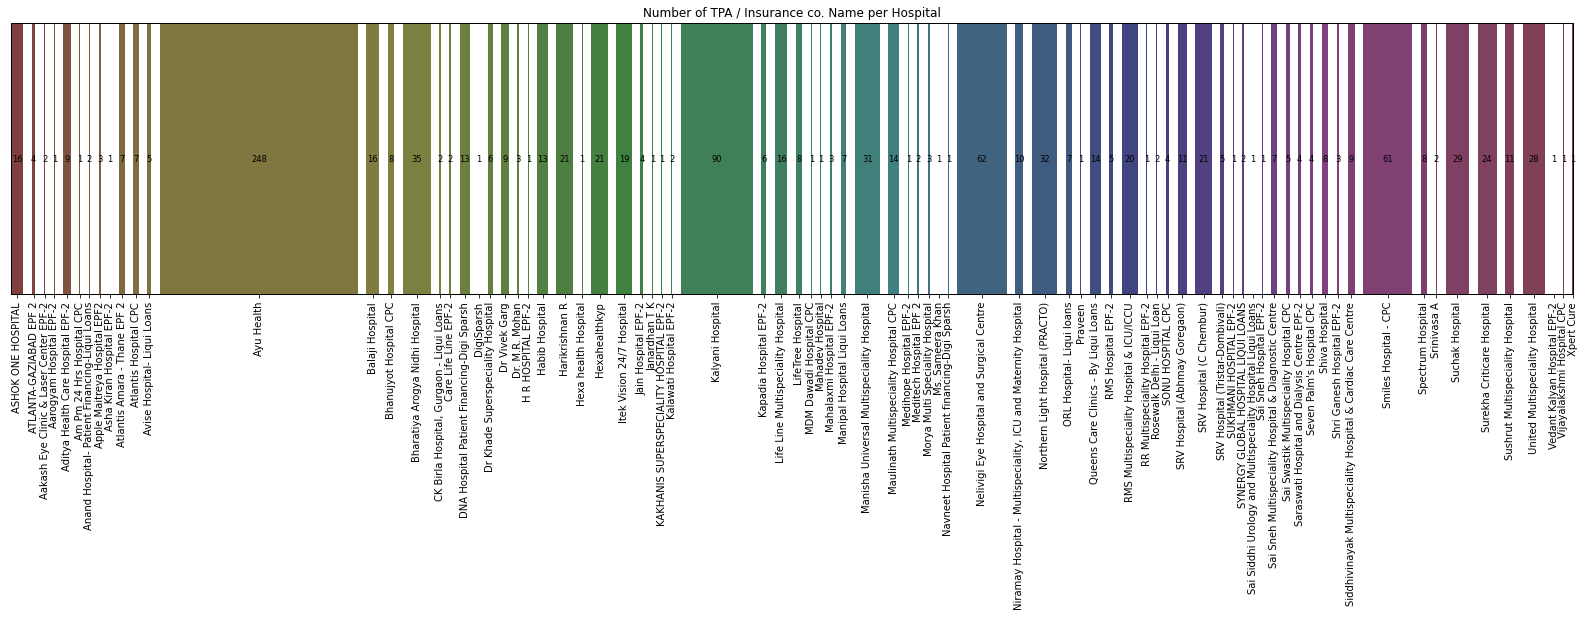

In [ ]:
data = df[['Hospital Name','TPA / Insurance co. Name']].groupby(['Hospital Name']).count()
#dict {'Hospital Name':'Patient Count'}
d = {}
for i in range(len(data)):
  d[data.index[i]]=data.iloc[i,0]

#labelizer 
#https://apimirror.com/statsmodels/generated/statsmodels.graphics.mosaicplot.mosaic

label = {}
for i in d.keys():
  label[(i,)]=str(d[i])
labelizer = lambda k:label[k]

#Plotting mosaic / Marimekka plot 

index = df['TPA / Insurance co. Name'].value_counts()
plt.rcParams["figure.figsize"]=(28, 5)
mosaic(d,label_rotation=90,labelizer=labelizer,title='Number of TPA / Insurance co. Name per Hospital',gap=0.01)
plt.show()

In [ ]:
data=df[['Hospital Name','TPA / Insurance co. Name','Patient Name']].groupby(by=['Hospital Name','TPA / Insurance co. Name']).count()

{("('Sai Sneh Multispeciality Hospital & Diagnostic Centre', 'Bajaj Allianz General Insurance Co. Ltd')",): '1', ("('Sai Sneh Multispeciality Hospital & Diagnostic Centre', 'HDFC ERGO General Insurance Co.Ltd.')",): '2', ("('Sai Sneh Multispeciality Hospital & Diagnostic Centre', 'ICICI LOMBARD General Insurance Co. Ltd.')",): '1', ("('Sai Sneh Multispeciality Hospital & Diagnostic Centre', 'Medi Assist Insurance TPA Pvt. Ltd')",): '2', ("('Sai Sneh Multispeciality Hospital & Diagnostic Centre', 'Star Health & Allied Insurance Co.Ltd.')",): '1', ("('Suchak Hospital', 'Care Health Insurance Ltd')",): '2', ("('Suchak Hospital', 'HDFC ERGO General Insurance Co.Ltd.')",): '3', ("('Suchak Hospital', 'ICICI LOMBARD General Insurance Co. Ltd.')",): '1', ("('Suchak Hospital', 'Medi Assist Insurance TPA Pvt. Ltd')",): '5', ("('Suchak Hospital', 'Star Health & Allied Insurance Co.Ltd.')",): '2'}


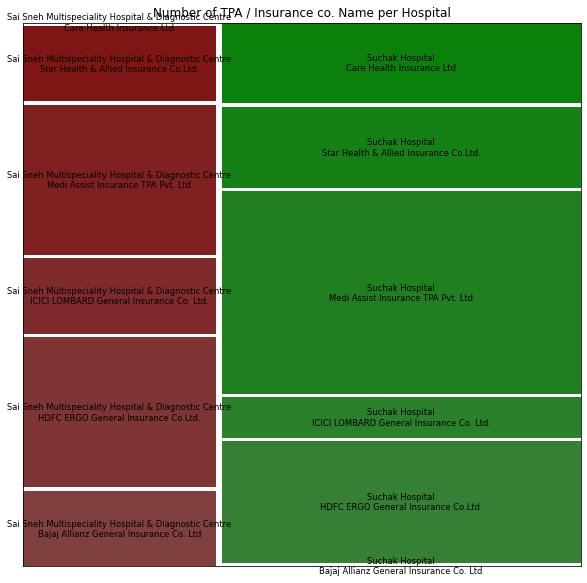

In [ ]:
data = df[0:20][['Hospital Name','Patient Name','TPA / Insurance co. Name']].groupby(['Hospital Name','TPA / Insurance co. Name']).count()
#dict {'Hospital Name':'Patient Count'}
d = {}
for i in range(len(data)):
  d[data.index[i]]=data.iloc[i,0]
#print(d)
#labelizer 
#https://apimirror.com/statsmodels/generated/statsmodels.graphics.mosaicplot.mosaic

label = {}
for i in d.keys():
  label[(str(i),)]=str(d[i])
labelizer = lambda k:label[k]
print(label)
#Plotting mosaic / Marimekka plot 

index = df['TPA / Insurance co. Name'].value_counts()
plt.rcParams["figure.figsize"]=(10, 10)
dataset = mosaic(d,label_rotation=[90,0],title='Number of TPA / Insurance co. Name per Hospital',gap=0.01,axes_label=False)
plt.show()



```
Visualize the case status of the patients in any form of chart or graph and also prepare a financial chart which shows the spilt up of different expenses such as pharmacy and diagnostic expenses etc.
```



Index(['File Dispatched', 'Final Approval Received', 'PreAuth Approved',
       'Claim Rejected', 'Claim Settled', 'Query Pending', 'Preauth Initiated',
       'New', 'Final Approval Initiated'],
      dtype='object')
[359 184 176 175 101  39  22  13   7]


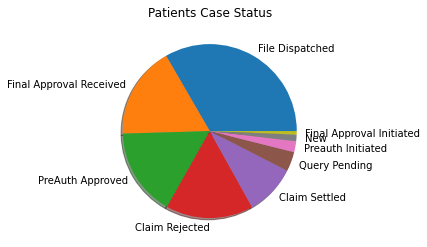

In [ ]:
labels=df['Case Status'].value_counts().index
print(labels)
values=df['Case Status'].value_counts().values
print(values)
plt.title('Patients Case Status')
plt.pie(values,labels=labels,shadow=True)
#plt.legend()
plt.show()


In [ ]:
Finance=df[['Pharmacy Expenses (Rs.)','Diagnostics Expenses (Rs.)','Professional Charges','Room Rent','Other Charges']].sum()

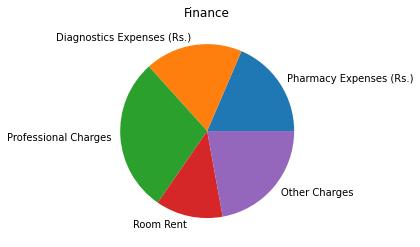

In [ ]:
labels=Finance.index
labels
plt.title('Finance')
plt.pie(Finance,labels=labels)
plt.show()



```
Figure out the total no of days spent in the hospital by each patient using the date of admission and discharge.
```



In [ ]:
#replacing - with current date 
df['Date of Discharge'].replace('-','01-06-2022',inplace=True)

In [ ]:
df[['Date of Admission','Date of Discharge']]
#splitting date into DD , MM , YYYY
df['AdmissionDate']=df['Date of Admission'].str.split('-')
df['AdmissionDate']
df['DischargeDate']=df['Date of Discharge'].str.split('-')
#df['AdmissionDate'].value_counts()

In [ ]:
from datetime import date
a = date(2011,11,24)
b = date(2011,10,17)
a-b
(a-b).days
b=[date(int(i[2]),int(i[1]),int(i[0])) for i in df['AdmissionDate']]
a=[date(int(i[2]),int(i[1]),int(i[0])) for i in df['DischargeDate']]
df['DaysInHospital']=[(i-j).days for i,j in zip(a,b)]

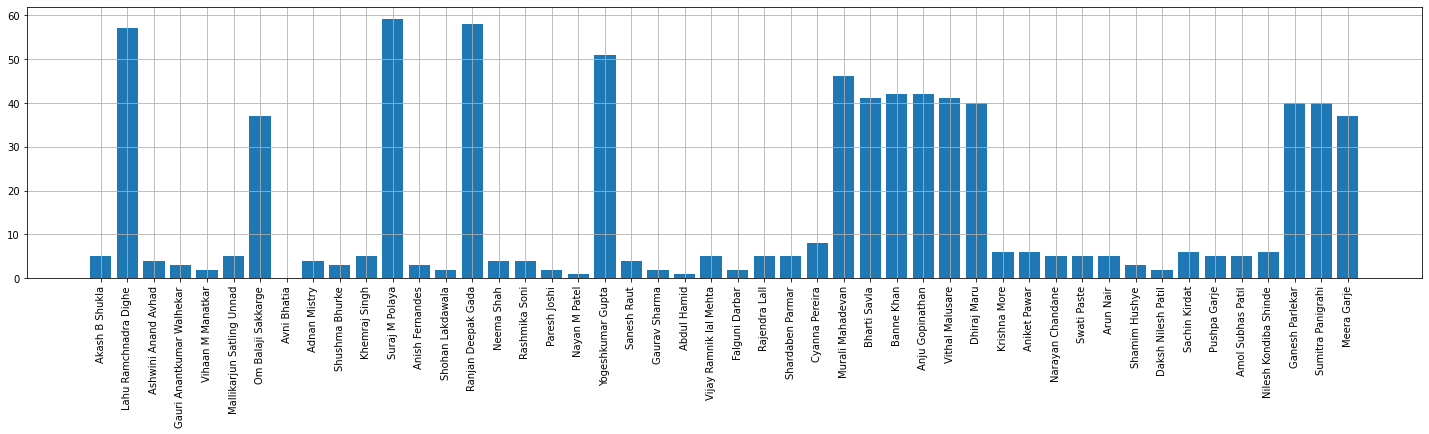

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,5))
plt.grid()
#plotting Bar plot for first 50 patients
plt.bar(df['Patient Name'][0:50],df['DaysInHospital'][0:50])
plt.xticks(rotation=90)
plt.show()